<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/1200px-Pandas_logo.svg.png" width="25%" height="25%" />

# Pandas - Unit 16 - Pandas Data Visualization Part 1

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%202%20-%20Unit%20Objective.png"> Unit Objectives

* Visualize data with Pandas built-in capabilities, using line plot, histogram and box plot

---

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%204%20-%20Import%20Package%20for%20Learning.png"> Import Package for Learning

import numpy as np
import pandas as pd

---

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Pandas Data Visualization Part 1

### Disclaimer and imports

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> **You will only start understanding objectively your data, when you start visualizing it**
* Pandas has built-in methods/functions for visualizing data, that will help you to better understand your data.
  * Even though it is related to Pandas, we need to import matplotlib to use. We will study in more detail matplotlib in the future. For now, you just need to be aware of it.
* Pandas capabilities/flexibilities for plotting can not be compared to Matplotlib, Seaborn or Plotly. 
  * You typically use Pandas plotting capabilities for quick visualizations. For more elaborated visualizations, we will consider other libraries that we will cover in the course

import matplotlib.pyplot as plt

### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> .plot()

You can use `.plot()` to visualize data in Pandas. The documentation is [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)
* A relevant argument is `'kind'`, where you determine the kind of plot to produce. The options include:

  * 'line' : line plot (default)
  * 'bar' : vertical bar plot
  * 'barh' : horizontal bar plot
  * 'hist' : histogram
  * 'box' : boxplot
  * 'kde' : Kernel Density Estimation plot
  * 'area' : area plot
  * 'pie' : pie plot
  * 'scatter' : scatter plot



A good understanding of how to visualize data based on its data types and project experience are key to the proper usage of this function.
  * We will start exploring  the plots and present additional arguments

---

For the next set of exercise we will use datasets from Seaborn

import seaborn as sns
sns.get_dataset_names()

---

### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Line Plot

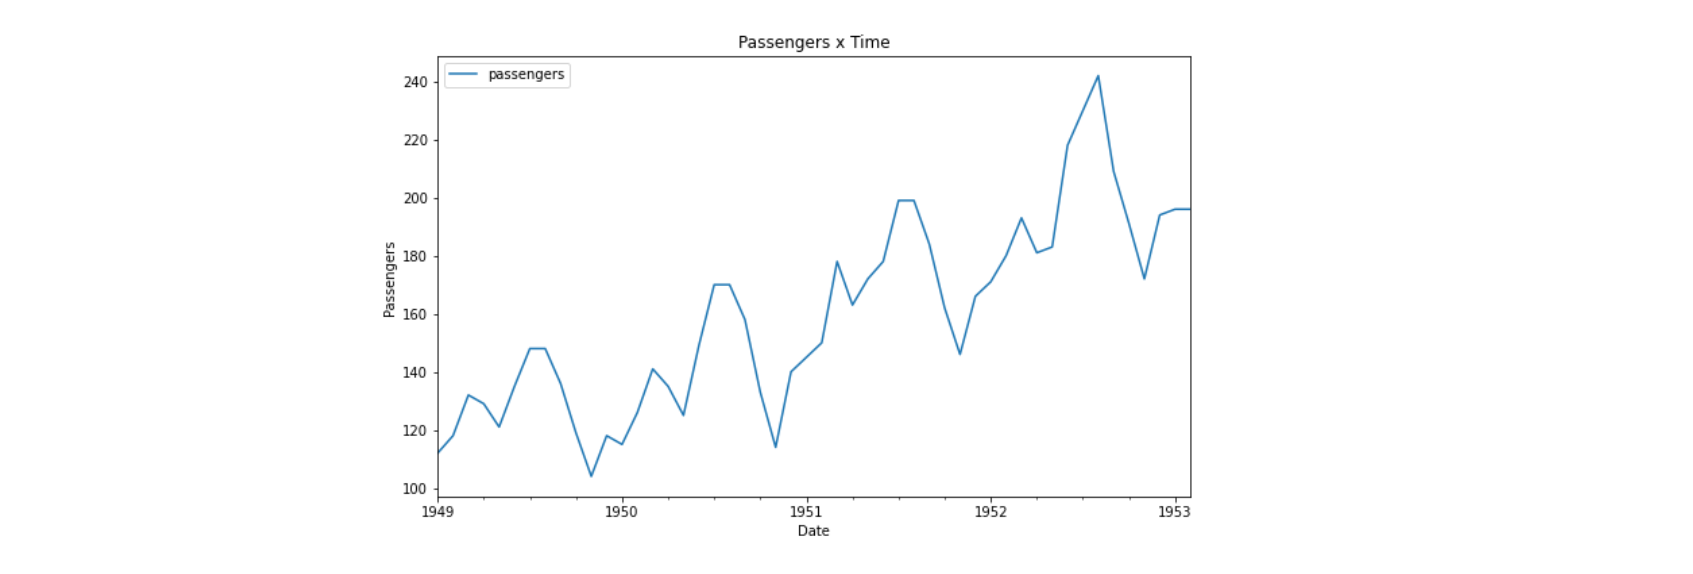

We will consider the flights dataset

df = sns.load_dataset('flights')
df = df.head(50)
print(df.shape)
df.head()

We need to process the data for this exercise
  * First we transform year and month to string using `.astype()`
  * Then we combine the strings in the pattern:  month - year, so we can convert this pattern to date with `pd.to_datetime()`
  * We finally set Date as index with `.set_index()`

df['year'] = df['year'].astype('str')
df['month'] = df['month'].astype('str')
df['Date'] = pd.to_datetime(df['month'] + '-' + df['year'] )
df.set_index('Date',inplace=True)
df.head()

We are interested to produce a **line plot**, where y values are passengers and x values are Date.
  * By default, x is the index. In case you want another variable, you can specify it.
  * figsize is a tuple to set plot height and width
  * xlabel is x-axis label
  * ylabel is y-axis label
  * title is plot title.

* **plt.show()**
  * `plt.show()` gives the command to plot.

df.plot(kind='line',y='passengers',
        figsize=(10,6),
        title='Passengers x Time', xlabel='Date', ylabel='Passengers'
        )
plt.show()

You can process the data and look for the average levels over the years
  * We first groupby year, set `as_index=False`
  * then aggreate and create AvgLevels as mean of passengers
  * finally we create a line plot, indicating x and y. We just used one argument here: figsize

* We notice a trend that passengers levels increased overtime.
  * We can't inform that levels increasd just by plotting, we have statistical tests for that, which we will learn in future lessons. This plot just helps to see a trend over the years, and the behaviour is a increase

(df
 .groupby(by=['year'],as_index=False)
 .agg(AvgLevels=('passengers','mean'))
 .plot(kind='line',x='year',y='AvgLevels', figsize=(5,5))
 )
plt.show()

You can plot multiple lines in your line plot
  * We create Col1 as a expression made with NumPy
  * This variable doesn't have any particular business meaning, it is just for teaching purpose

df['Col1'] = 300 + 20 * np.random.randn(df.shape[0]) + np.random.randint(low=-10, high=20, size=df.shape[0])
df.head()

We plot the dataset using `.plot(),` `kind='line'`
  * we parse a list for y, containing passengers and Col1

df.plot(kind='line',y=['passengers','Col1'],
        figsize=(10,6),
        title='Passengers and Col1 x Time', xlabel='Date', ylabel=' '
        )
plt.show()

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%205%20-%20Practice.png"> **PRACTICE** : We will use the DataFrame below to create a bar chart.


data = {'Product':['Bread','Bread','Milk','Milk','Milk','Butter','Butter','Butter'],
        'Person':['Anna','Anna','Brian','John','John','Carl','Sarah','Anna'],
        'Sales':[200,120,340,124,243,350,500,240],
        'Quantity':[3,5,3,8,2,7,5,4],
        'Margin':[100,20,280,50,100,67,300,200]}

df_practice = pd.DataFrame(data)
df_practice

You are interested in using a line chart to analyze the quantity of each product sold by each person.

On the DataFrame df_practice, you should do a 
* groupby by Product and Person
* then aggregate and create Quantity as the sum of Quantity
* Then use plot setting kind to line and ylabel to Quantity and use figsize with 10,5

# Write your code here.
(df_practice
 .groupby(by=['Product','Person'])
 .agg(Quantity=('Quantity','sum'))
 .plot(kind='line', y='Quantity', ylabel='Quantity' , figsize=(10,5))
)
plt.show()

At the end, your plot should look like this

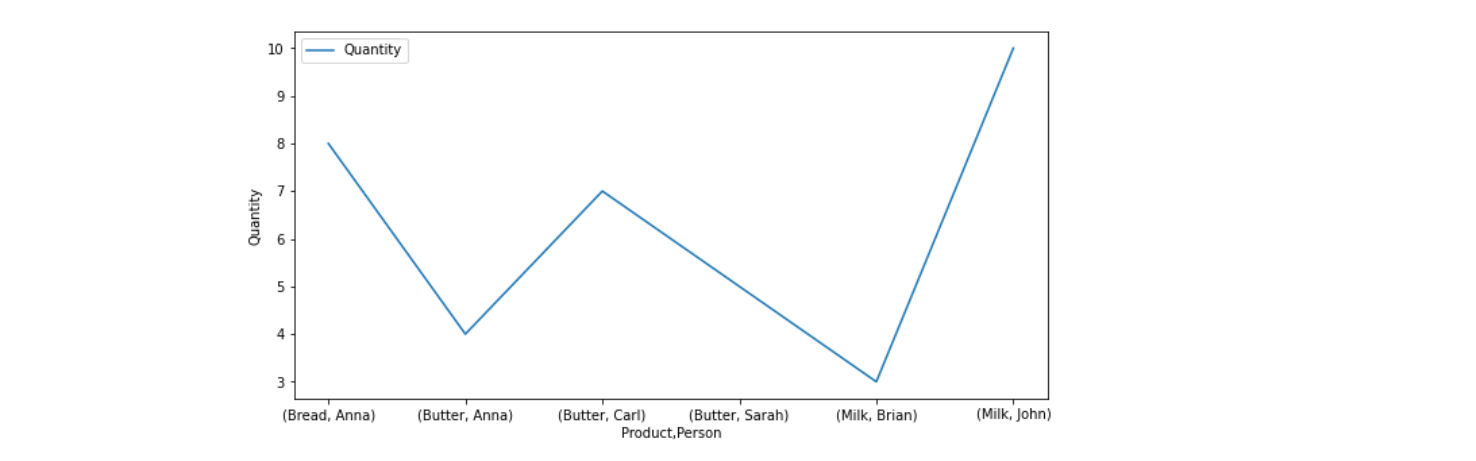

---